In [ ]:
!pip install tqdm scipy

In [ ]:
# thymio start up
from tdmclient import ClientAsync
client = ClientAsync()
node = await client.wait_for_node()
await node.lock()

In [ ]:
# timer
from threading import Timer

class RepeatedTimer(object):
    def __init__(self, interval, function, *args, **kwargs):
        self._timer     = None
        self.interval   = interval
        self.function   = function
        self.args       = args
        self.kwargs     = kwargs
        self.is_running = False
        self.start()

    def _run(self):
        self.is_running = False
        self.start()
        self.function(*self.args, **self.kwargs)

    def start(self):
        if not self.is_running:
            self._timer = Timer(self.interval, self._run)
            self._timer.start()
            self.is_running = True

    def stop(self):
        self._timer.cancel()
        self.is_running = False

In [ ]:
# need to drive Thymio over the sheet with black/grey bars
# straight for translation data, in a circle for rotation data
acquire_data_trans = False  # set to True to acquire new data in translation from the Thymio robot
acquire_data_rot = False  # set to True to acquire new data in rotation from the Thymio robot
Ts = 0.1
thymio_data_trans = []
thymio_data_rot = []

def motors(left, right):
    return {
        "motor.left.target": [left],
        "motor.right.target": [right],
    }

def get_data_trans():
    thymio_data_trans.append({"ground":list(node["prox.ground.reflected"]), 
                        "sensor":list(node["prox.ground.reflected"]),
                        "left_speed":node["motor.left.speed"],
                        "right_speed":node["motor.right.speed"]})
    
def get_data_rot():
    thymio_data_rot.append({"ground":list(node["prox.ground.reflected"]), 
                        "sensor":list(node["prox.ground.reflected"]),
                        "left_speed":node["motor.left.speed"],
                        "right_speed":node["motor.right.speed"]})
    

if acquire_data_trans:
    await node.wait_for_variables() # wait for Thymio variables values
    rt = RepeatedTimer(Ts, get_data_trans) # it auto-starts, no need of rt.start()

    try:
        await client.sleep(5)
        node.send_set_variables(motors(50, 50))
        await client.sleep(25) # your long-running job  hre
    finally:
        rt.stop() # better in a try/finally block to make sure the program ends!
        node.send_set_variables(motors(0, 0))
else:
    thymio_data_trans = [{'ground': [177, 496], 'sensor': [177, 496], 'left_speed': 0, 'right_speed': 65535}, {'ground': [178, 495], 'sensor': [178, 495], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 495], 'sensor': [177, 495], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 496], 'sensor': [177, 496], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 495], 'sensor': [177, 495], 'left_speed': 0, 'right_speed': 65535}, {'ground': [178, 496], 'sensor': [178, 496], 'left_speed': 0, 'right_speed': 65535}, {'ground': [178, 495], 'sensor': [178, 495], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 496], 'sensor': [177, 496], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 496], 'sensor': [177, 496], 'left_speed': 0, 'right_speed': 65535}, {'ground': [178, 495], 'sensor': [178, 495], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 495], 'sensor': [177, 495], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 497], 'sensor': [177, 497], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 495], 'sensor': [177, 495], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 495], 'sensor': [177, 495], 'left_speed': 0, 'right_speed': 65535}, {'ground': [178, 496], 'sensor': [178, 496], 'left_speed': 0, 'right_speed': 65535}, {'ground': [180, 546], 'sensor': [180, 546], 'left_speed': 0, 'right_speed': 65535}, {'ground': [177, 454], 'sensor': [177, 454], 'left_speed': 0, 'right_speed': 65535}, {'ground': [97, 69], 'sensor': [97, 69], 'left_speed': 0, 'right_speed': 65535}, {'ground': [39, 41], 'sensor': [39, 41], 'left_speed': 0, 'right_speed': 0}, {'ground': [82, 47], 'sensor': [82, 47], 'left_speed': 0, 'right_speed': 65535}, {'ground': [34, 29], 'sensor': [34, 29], 'left_speed': 0, 'right_speed': 65535}, {'ground': [24, 9], 'sensor': [24, 9], 'left_speed': 0, 'right_speed': 65535}, {'ground': [899, 447], 'sensor': [899, 447], 'left_speed': 0, 'right_speed': 65535}, {'ground': [967, 631], 'sensor': [967, 631], 'left_speed': 0, 'right_speed': 65535}, {'ground': [972, 682], 'sensor': [972, 682], 'left_speed': 0, 'right_speed': 65535}, {'ground': [971, 675], 'sensor': [971, 675], 'left_speed': 0, 'right_speed': 65535}, {'ground': [970, 651], 'sensor': [970, 651], 'left_speed': 0, 'right_speed': 65535}, {'ground': [971, 642], 'sensor': [971, 642], 'left_speed': 0, 'right_speed': 65535}, {'ground': [970, 628], 'sensor': [970, 628], 'left_speed': 0, 'right_speed': 65535}, {'ground': [970, 628], 'sensor': [970, 628], 'left_speed': 0, 'right_speed': 65535}, {'ground': [970, 628], 'sensor': [970, 628], 'left_speed': 0, 'right_speed': 65535}, {'ground': [970, 627], 'sensor': [970, 627], 'left_speed': 0, 'right_speed': 65535}, {'ground': [970, 611], 'sensor': [970, 611], 'left_speed': 0, 'right_speed': 65535}, {'ground': [971, 604], 'sensor': [971, 604], 'left_speed': 0, 'right_speed': 0}, {'ground': [971, 598], 'sensor': [971, 598], 'left_speed': 0, 'right_speed': 65535}, {'ground': [972, 642], 'sensor': [972, 642], 'left_speed': 0, 'right_speed': 65535}, {'ground': [973, 714], 'sensor': [973, 714], 'left_speed': 0, 'right_speed': 65535}, {'ground': [973, 704], 'sensor': [973, 704], 'left_speed': 0, 'right_speed': 65535}, {'ground': [973, 702], 'sensor': [973, 702], 'left_speed': 0, 'right_speed': 0}, {'ground': [972, 700], 'sensor': [972, 700], 'left_speed': 0, 'right_speed': 65535}, {'ground': [973, 701], 'sensor': [973, 701], 'left_speed': 0, 'right_speed': 0}, {'ground': [974, 707], 'sensor': [974, 707], 'left_speed': 0, 'right_speed': 0}, {'ground': [974, 711], 'sensor': [974, 711], 'left_speed': 0, 'right_speed': 65535}, {'ground': [974, 707], 'sensor': [974, 707], 'left_speed': 0, 'right_speed': 65535}, {'ground': [972, 702], 'sensor': [972, 702], 'left_speed': 0, 'right_speed': 65535}, {'ground': [973, 686], 'sensor': [973, 686], 'left_speed': 0, 'right_speed': 65535}, {'ground': [972, 662], 'sensor': [972, 662], 'left_speed': 0, 'right_speed': 65535}, {'ground': [968, 602], 'sensor': [968, 602], 'left_speed': 0, 'right_speed': 65535}, {'ground': [954, 539], 'sensor': [954, 539], 'left_speed': 0, 'right_speed': 65535}, {'ground': [833, 464], 'sensor': [833, 464], 'left_speed': 0, 'right_speed': 65535}, {'ground': [826, 460], 'sensor': [826, 460], 'left_speed': 2, 'right_speed': 65535}, {'ground': [511, 244], 'sensor': [511, 244], 'left_speed': 39, 'right_speed': 31}, {'ground': [306, 131], 'sensor': [306, 131], 'left_speed': 49, 'right_speed': 35}, {'ground': [194, 87], 'sensor': [194, 87], 'left_speed': 58, 'right_speed': 57}, {'ground': [174, 84], 'sensor': [174, 84], 'left_speed': 64, 'right_speed': 42}, {'ground': [174, 84], 'sensor': [174, 84], 'left_speed': 38, 'right_speed': 32}, {'ground': [174, 84], 'sensor': [174, 84], 'left_speed': 38, 'right_speed': 32}, {'ground': [171, 84], 'sensor': [171, 84], 'left_speed': 58, 'right_speed': 30}, {'ground': [169, 81], 'sensor': [169, 81], 'left_speed': 49, 'right_speed': 56}, {'ground': [167, 80], 'sensor': [167, 80], 'left_speed': 42, 'right_speed': 55}, {'ground': [167, 81], 'sensor': [167, 81], 'left_speed': 46, 'right_speed': 35}, {'ground': [168, 80], 'sensor': [168, 80], 'left_speed': 59, 'right_speed': 57}, {'ground': [172, 81], 'sensor': [172, 81], 'left_speed': 63, 'right_speed': 54}, {'ground': [173, 84], 'sensor': [173, 84], 'left_speed': 45, 'right_speed': 56}, {'ground': [171, 84], 'sensor': [171, 84], 'left_speed': 60, 'right_speed': 55}, {'ground': [171, 84], 'sensor': [171, 84], 'left_speed': 60, 'right_speed': 55}, {'ground': [165, 84], 'sensor': [165, 84], 'left_speed': 54, 'right_speed': 36}, {'ground': [166, 86], 'sensor': [166, 86], 'left_speed': 57, 'right_speed': 43}, {'ground': [166, 86], 'sensor': [166, 86], 'left_speed': 41, 'right_speed': 43}, {'ground': [168, 87], 'sensor': [168, 87], 'left_speed': 59, 'right_speed': 47}, {'ground': [175, 96], 'sensor': [175, 96], 'left_speed': 42, 'right_speed': 48}, {'ground': [280, 157], 'sensor': [280, 157], 'left_speed': 61, 'right_speed': 50}, {'ground': [503, 262], 'sensor': [503, 262], 'left_speed': 60, 'right_speed': 49}, {'ground': [658, 355], 'sensor': [658, 355], 'left_speed': 46, 'right_speed': 36}, {'ground': [639, 345], 'sensor': [639, 345], 'left_speed': 49, 'right_speed': 57}, {'ground': [639, 345], 'sensor': [639, 345], 'left_speed': 49, 'right_speed': 57}, {'ground': [501, 257], 'sensor': [501, 257], 'left_speed': 42, 'right_speed': 51}, {'ground': [187, 88], 'sensor': [187, 88], 'left_speed': 45, 'right_speed': 60}, {'ground': [166, 85], 'sensor': [166, 85], 'left_speed': 53, 'right_speed': 56}, {'ground': [166, 84], 'sensor': [166, 84], 'left_speed': 60, 'right_speed': 55}, {'ground': [168, 84], 'sensor': [168, 84], 'left_speed': 50, 'right_speed': 53}, {'ground': [169, 85], 'sensor': [169, 85], 'left_speed': 57, 'right_speed': 47}, {'ground': [167, 87], 'sensor': [167, 87], 'left_speed': 49, 'right_speed': 41}, {'ground': [169, 86], 'sensor': [169, 86], 'left_speed': 47, 'right_speed': 45}, {'ground': [167, 84], 'sensor': [167, 84], 'left_speed': 66, 'right_speed': 33}, {'ground': [164, 85], 'sensor': [164, 85], 'left_speed': 56, 'right_speed': 62}, {'ground': [162, 85], 'sensor': [162, 85], 'left_speed': 43, 'right_speed': 54}, {'ground': [163, 85], 'sensor': [163, 85], 'left_speed': 54, 'right_speed': 58}, {'ground': [163, 85], 'sensor': [163, 85], 'left_speed': 41, 'right_speed': 54}, {'ground': [160, 84], 'sensor': [160, 84], 'left_speed': 59, 'right_speed': 56}, {'ground': [156, 82], 'sensor': [156, 82], 'left_speed': 52, 'right_speed': 60}, {'ground': [157, 82], 'sensor': [157, 82], 'left_speed': 64, 'right_speed': 48}, {'ground': [162, 83], 'sensor': [162, 83], 'left_speed': 64, 'right_speed': 56}, {'ground': [166, 82], 'sensor': [166, 82], 'left_speed': 47, 'right_speed': 55}, {'ground': [165, 91], 'sensor': [165, 91], 'left_speed': 41, 'right_speed': 44}, {'ground': [254, 156], 'sensor': [254, 156], 'left_speed': 67, 'right_speed': 59}, {'ground': [477, 279], 'sensor': [477, 279], 'left_speed': 53, 'right_speed': 57}, {'ground': [678, 391], 'sensor': [678, 391], 'left_speed': 57, 'right_speed': 59}, {'ground': [762, 426], 'sensor': [762, 426], 'left_speed': 67, 'right_speed': 57}, {'ground': [738, 394], 'sensor': [738, 394], 'left_speed': 41, 'right_speed': 50}, {'ground': [649, 332], 'sensor': [649, 332], 'left_speed': 60, 'right_speed': 56}, {'ground': [596, 319], 'sensor': [596, 319], 'left_speed': 65, 'right_speed': 59}, {'ground': [593, 321], 'sensor': [593, 321], 'left_speed': 47, 'right_speed': 48}, {'ground': [596, 325], 'sensor': [596, 325], 'left_speed': 58, 'right_speed': 33}, {'ground': [601, 330], 'sensor': [601, 330], 'left_speed': 58, 'right_speed': 55}, {'ground': [605, 331], 'sensor': [605, 331], 'left_speed': 48, 'right_speed': 54}, {'ground': [608, 331], 'sensor': [608, 331], 'left_speed': 42, 'right_speed': 43}, {'ground': [607, 330], 'sensor': [607, 330], 'left_speed': 64, 'right_speed': 55}, {'ground': [605, 329], 'sensor': [605, 329], 'left_speed': 46, 'right_speed': 42}, {'ground': [605, 329], 'sensor': [605, 329], 'left_speed': 55, 'right_speed': 61}, {'ground': [604, 330], 'sensor': [604, 330], 'left_speed': 52, 'right_speed': 56}, {'ground': [604, 330], 'sensor': [604, 330], 'left_speed': 43, 'right_speed': 47}, {'ground': [607, 331], 'sensor': [607, 331], 'left_speed': 64, 'right_speed': 54}, {'ground': [604, 332], 'sensor': [604, 332], 'left_speed': 63, 'right_speed': 57}, {'ground': [600, 334], 'sensor': [600, 334], 'left_speed': 56, 'right_speed': 61}, {'ground': [598, 335], 'sensor': [598, 335], 'left_speed': 64, 'right_speed': 57}, {'ground': [594, 337], 'sensor': [594, 337], 'left_speed': 60, 'right_speed': 51}, {'ground': [592, 339], 'sensor': [592, 339], 'left_speed': 49, 'right_speed': 48}, {'ground': [593, 350], 'sensor': [593, 350], 'left_speed': 57, 'right_speed': 50}, {'ground': [642, 404], 'sensor': [642, 404], 'left_speed': 58, 'right_speed': 45}, {'ground': [776, 487], 'sensor': [776, 487], 'left_speed': 42, 'right_speed': 56}, {'ground': [776, 487], 'sensor': [776, 487], 'left_speed': 42, 'right_speed': 56}, {'ground': [863, 531], 'sensor': [863, 531], 'left_speed': 65, 'right_speed': 53}, {'ground': [760, 410], 'sensor': [760, 410], 'left_speed': 54, 'right_speed': 48}, {'ground': [660, 363], 'sensor': [660, 363], 'left_speed': 43, 'right_speed': 49}, {'ground': [617, 364], 'sensor': [617, 364], 'left_speed': 55, 'right_speed': 46}, {'ground': [617, 364], 'sensor': [617, 364], 'left_speed': 55, 'right_speed': 46}, {'ground': [599, 356], 'sensor': [599, 356], 'left_speed': 64, 'right_speed': 46}, {'ground': [600, 348], 'sensor': [600, 348], 'left_speed': 48, 'right_speed': 46}, {'ground': [604, 343], 'sensor': [604, 343], 'left_speed': 54, 'right_speed': 46}, {'ground': [601, 340], 'sensor': [601, 340], 'left_speed': 63, 'right_speed': 46}, {'ground': [598, 339], 'sensor': [598, 339], 'left_speed': 46, 'right_speed': 49}, {'ground': [594, 340], 'sensor': [594, 340], 'left_speed': 53, 'right_speed': 48}, {'ground': [590, 343], 'sensor': [590, 343], 'left_speed': 64, 'right_speed': 48}, {'ground': [592, 347], 'sensor': [592, 347], 'left_speed': 47, 'right_speed': 54}, {'ground': [594, 348], 'sensor': [594, 348], 'left_speed': 59, 'right_speed': 51}, {'ground': [595, 352], 'sensor': [595, 352], 'left_speed': 53, 'right_speed': 49}, {'ground': [598, 352], 'sensor': [598, 352], 'left_speed': 48, 'right_speed': 50}, {'ground': [601, 352], 'sensor': [601, 352], 'left_speed': 59, 'right_speed': 46}, {'ground': [604, 354], 'sensor': [604, 354], 'left_speed': 64, 'right_speed': 47}, {'ground': [605, 354], 'sensor': [605, 354], 'left_speed': 45, 'right_speed': 45}, {'ground': [617, 386], 'sensor': [617, 386], 'left_speed': 52, 'right_speed': 52}, {'ground': [702, 466], 'sensor': [702, 466], 'left_speed': 65, 'right_speed': 51}, {'ground': [831, 497], 'sensor': [831, 497], 'left_speed': 48, 'right_speed': 47}, {'ground': [774, 398], 'sensor': [774, 398], 'left_speed': 56, 'right_speed': 50}, {'ground': [603, 234], 'sensor': [603, 234], 'left_speed': 56, 'right_speed': 54}, {'ground': [382, 118], 'sensor': [382, 118], 'left_speed': 44, 'right_speed': 53}, {'ground': [213, 97], 'sensor': [213, 97], 'left_speed': 53, 'right_speed': 53}, {'ground': [184, 100], 'sensor': [184, 100], 'left_speed': 67, 'right_speed': 49}, {'ground': [186, 99], 'sensor': [186, 99], 'left_speed': 45, 'right_speed': 44}, {'ground': [186, 98], 'sensor': [186, 98], 'left_speed': 58, 'right_speed': 43}, {'ground': [189, 98], 'sensor': [189, 98], 'left_speed': 54, 'right_speed': 45}, {'ground': [190, 94], 'sensor': [190, 94], 'left_speed': 53, 'right_speed': 50}, {'ground': [188, 91], 'sensor': [188, 91], 'left_speed': 63, 'right_speed': 50}, {'ground': [184, 93], 'sensor': [184, 93], 'left_speed': 48, 'right_speed': 50}, {'ground': [187, 92], 'sensor': [187, 92], 'left_speed': 56, 'right_speed': 49}, {'ground': [189, 92], 'sensor': [189, 92], 'left_speed': 62, 'right_speed': 49}, {'ground': [202, 94], 'sensor': [202, 94], 'left_speed': 46, 'right_speed': 46}, {'ground': [172, 95], 'sensor': [172, 95], 'left_speed': 58, 'right_speed': 50}, {'ground': [176, 78], 'sensor': [176, 78], 'left_speed': 47, 'right_speed': 49}, {'ground': [177, 79], 'sensor': [177, 79], 'left_speed': 56, 'right_speed': 49}, {'ground': [171, 72], 'sensor': [171, 72], 'left_speed': 55, 'right_speed': 48}, {'ground': [159, 87], 'sensor': [159, 87], 'left_speed': 52, 'right_speed': 47}, {'ground': [169, 165], 'sensor': [169, 165], 'left_speed': 50, 'right_speed': 45}, {'ground': [304, 285], 'sensor': [304, 285], 'left_speed': 52, 'right_speed': 48}, {'ground': [548, 374], 'sensor': [548, 374], 'left_speed': 55, 'right_speed': 49}, {'ground': [663, 354], 'sensor': [663, 354], 'left_speed': 55, 'right_speed': 50}, {'ground': [586, 206], 'sensor': [586, 206], 'left_speed': 52, 'right_speed': 51}, {'ground': [403, 93], 'sensor': [403, 93], 'left_speed': 58, 'right_speed': 50}, {'ground': [225, 84], 'sensor': [225, 84], 'left_speed': 59, 'right_speed': 47}, {'ground': [181, 91], 'sensor': [181, 91], 'left_speed': 46, 'right_speed': 47}, {'ground': [181, 91], 'sensor': [181, 91], 'left_speed': 46, 'right_speed': 47}, {'ground': [179, 99], 'sensor': [179, 99], 'left_speed': 63, 'right_speed': 49}, {'ground': [192, 98], 'sensor': [192, 98], 'left_speed': 53, 'right_speed': 53}, {'ground': [194, 95], 'sensor': [194, 95], 'left_speed': 57, 'right_speed': 49}, {'ground': [183, 91], 'sensor': [183, 91], 'left_speed': 56, 'right_speed': 45}, {'ground': [176, 89], 'sensor': [176, 89], 'left_speed': 47, 'right_speed': 45}, {'ground': [175, 90], 'sensor': [175, 90], 'left_speed': 53, 'right_speed': 47}, {'ground': [178, 92], 'sensor': [178, 92], 'left_speed': 66, 'right_speed': 48}, {'ground': [177, 94], 'sensor': [177, 94], 'left_speed': 49, 'right_speed': 48}, {'ground': [180, 90], 'sensor': [180, 90], 'left_speed': 59, 'right_speed': 50}, {'ground': [181, 88], 'sensor': [181, 88], 'left_speed': 58, 'right_speed': 47}, {'ground': [179, 87], 'sensor': [179, 87], 'left_speed': 46, 'right_speed': 51}, {'ground': [181, 90], 'sensor': [181, 90], 'left_speed': 59, 'right_speed': 51}, {'ground': [189, 100], 'sensor': [189, 100], 'left_speed': 50, 'right_speed': 51}, {'ground': [193, 153], 'sensor': [193, 153], 'left_speed': 56, 'right_speed': 48}, {'ground': [317, 316], 'sensor': [317, 316], 'left_speed': 53, 'right_speed': 48}, {'ground': [605, 412], 'sensor': [605, 412], 'left_speed': 47, 'right_speed': 48}, {'ground': [605, 412], 'sensor': [605, 412], 'left_speed': 47, 'right_speed': 48}, {'ground': [684, 335], 'sensor': [684, 335], 'left_speed': 60, 'right_speed': 49}, {'ground': [575, 174], 'sensor': [575, 174], 'left_speed': 47, 'right_speed': 49}, {'ground': [224, 86], 'sensor': [224, 86], 'left_speed': 53, 'right_speed': 49}, {'ground': [180, 86], 'sensor': [180, 86], 'left_speed': 49, 'right_speed': 46}, {'ground': [175, 85], 'sensor': [175, 85], 'left_speed': 65, 'right_speed': 49}, {'ground': [175, 85], 'sensor': [175, 85], 'left_speed': 65, 'right_speed': 49}, {'ground': [177, 86], 'sensor': [177, 86], 'left_speed': 48, 'right_speed': 47}, {'ground': [182, 88], 'sensor': [182, 88], 'left_speed': 51, 'right_speed': 47}, {'ground': [181, 87], 'sensor': [181, 87], 'left_speed': 62, 'right_speed': 50}, {'ground': [176, 86], 'sensor': [176, 86], 'left_speed': 46, 'right_speed': 50}, {'ground': [177, 89], 'sensor': [177, 89], 'left_speed': 65, 'right_speed': 45}, {'ground': [183, 94], 'sensor': [183, 94], 'left_speed': 46, 'right_speed': 47}, {'ground': [183, 94], 'sensor': [183, 94], 'left_speed': 46, 'right_speed': 47}, {'ground': [189, 96], 'sensor': [189, 96], 'left_speed': 54, 'right_speed': 46}, {'ground': [189, 97], 'sensor': [189, 97], 'left_speed': 42, 'right_speed': 45}, {'ground': [188, 96], 'sensor': [188, 96], 'left_speed': 55, 'right_speed': 47}, {'ground': [189, 97], 'sensor': [189, 97], 'left_speed': 45, 'right_speed': 49}, {'ground': [190, 101], 'sensor': [190, 101], 'left_speed': 53, 'right_speed': 48}, {'ground': [190, 101], 'sensor': [190, 101], 'left_speed': 53, 'right_speed': 48}, {'ground': [241, 318], 'sensor': [241, 318], 'left_speed': 62, 'right_speed': 49}, {'ground': [241, 318], 'sensor': [241, 318], 'left_speed': 62, 'right_speed': 49}, {'ground': [770, 478], 'sensor': [770, 478], 'left_speed': 55, 'right_speed': 48}, {'ground': [815, 401], 'sensor': [815, 401], 'left_speed': 65, 'right_speed': 53}, {'ground': [753, 350], 'sensor': [753, 350], 'left_speed': 47, 'right_speed': 47}, {'ground': [753, 350], 'sensor': [753, 350], 'left_speed': 47, 'right_speed': 47}, {'ground': [658, 346], 'sensor': [658, 346], 'left_speed': 55, 'right_speed': 49}, {'ground': [616, 344], 'sensor': [616, 344], 'left_speed': 57, 'right_speed': 48}, {'ground': [612, 342], 'sensor': [612, 342], 'left_speed': 47, 'right_speed': 44}, {'ground': [608, 344], 'sensor': [608, 344], 'left_speed': 62, 'right_speed': 46}, {'ground': [606, 341], 'sensor': [606, 341], 'left_speed': 53, 'right_speed': 49}, {'ground': [604, 342], 'sensor': [604, 342], 'left_speed': 60, 'right_speed': 49}, {'ground': [604, 340], 'sensor': [604, 340], 'left_speed': 45, 'right_speed': 51}, {'ground': [597, 339], 'sensor': [597, 339], 'left_speed': 62, 'right_speed': 48}, {'ground': [592, 335], 'sensor': [592, 335], 'left_speed': 46, 'right_speed': 46}, {'ground': [590, 332], 'sensor': [590, 332], 'left_speed': 52, 'right_speed': 53}, {'ground': [589, 333], 'sensor': [589, 333], 'left_speed': 53, 'right_speed': 59}, {'ground': [591, 333], 'sensor': [591, 333], 'left_speed': 64, 'right_speed': 65}, {'ground': [592, 333], 'sensor': [592, 333], 'left_speed': 46, 'right_speed': 60}, {'ground': [591, 333], 'sensor': [591, 333], 'left_speed': 55, 'right_speed': 49}, {'ground': [594, 334], 'sensor': [594, 334], 'left_speed': 61, 'right_speed': 33}, {'ground': [597, 360], 'sensor': [597, 360], 'left_speed': 48, 'right_speed': 56}, {'ground': [601, 431], 'sensor': [601, 431], 'left_speed': 61, 'right_speed': 57}, {'ground': [639, 549], 'sensor': [639, 549], 'left_speed': 61, 'right_speed': 59}, {'ground': [776, 671], 'sensor': [776, 671], 'left_speed': 56, 'right_speed': 58}, {'ground': [943, 750], 'sensor': [943, 750], 'left_speed': 60, 'right_speed': 60}, {'ground': [967, 768], 'sensor': [967, 768], 'left_speed': 46, 'right_speed': 58}, {'ground': [972, 770], 'sensor': [972, 770], 'left_speed': 49, 'right_speed': 51}, {'ground': [974, 770], 'sensor': [974, 770], 'left_speed': 49, 'right_speed': 54}, {'ground': [973, 769], 'sensor': [973, 769], 'left_speed': 64, 'right_speed': 58}, {'ground': [973, 770], 'sensor': [973, 770], 'left_speed': 41, 'right_speed': 44}, {'ground': [974, 768], 'sensor': [974, 768], 'left_speed': 61, 'right_speed': 55}, {'ground': [973, 757], 'sensor': [973, 757], 'left_speed': 56, 'right_speed': 47}, {'ground': [974, 736], 'sensor': [974, 736], 'left_speed': 43, 'right_speed': 40}, {'ground': [974, 708], 'sensor': [974, 708], 'left_speed': 55, 'right_speed': 42}, {'ground': [972, 720], 'sensor': [972, 720], 'left_speed': 47, 'right_speed': 49}, {'ground': [970, 716], 'sensor': [970, 716], 'left_speed': 48, 'right_speed': 42}, {'ground': [972, 708], 'sensor': [972, 708], 'left_speed': 50, 'right_speed': 35}, {'ground': [970, 702], 'sensor': [970, 702], 'left_speed': 40, 'right_speed': 60}, {'ground': [970, 702], 'sensor': [970, 702], 'left_speed': 43, 'right_speed': 57}, {'ground': [969, 694], 'sensor': [969, 694], 'left_speed': 62, 'right_speed': 49}, {'ground': [968, 692], 'sensor': [968, 692], 'left_speed': 41, 'right_speed': 53}, {'ground': [968, 702], 'sensor': [968, 702], 'left_speed': 57, 'right_speed': 37}, {'ground': [968, 712], 'sensor': [968, 712], 'left_speed': 62, 'right_speed': 49}, {'ground': [970, 738], 'sensor': [970, 738], 'left_speed': 42, 'right_speed': 51}, {'ground': [970, 738], 'sensor': [970, 738], 'left_speed': 42, 'right_speed': 51}, {'ground': [970, 751], 'sensor': [970, 751], 'left_speed': 68, 'right_speed': 57}, {'ground': [970, 746], 'sensor': [970, 746], 'left_speed': 40, 'right_speed': 39}, {'ground': [970, 744], 'sensor': [970, 744], 'left_speed': 53, 'right_speed': 48}, {'ground': [972, 728], 'sensor': [972, 728], 'left_speed': 35, 'right_speed': 49}, {'ground': [971, 729], 'sensor': [971, 729], 'left_speed': 41, 'right_speed': 55}, {'ground': [971, 729], 'sensor': [971, 729], 'left_speed': 41, 'right_speed': 55}, {'ground': [970, 727], 'sensor': [970, 727], 'left_speed': 59, 'right_speed': 55}, {'ground': [971, 727], 'sensor': [971, 727], 'left_speed': 59, 'right_speed': 57}, {'ground': [970, 738], 'sensor': [970, 738], 'left_speed': 52, 'right_speed': 44}, {'ground': [970, 724], 'sensor': [970, 724], 'left_speed': 62, 'right_speed': 57}, {'ground': [970, 708], 'sensor': [970, 708], 'left_speed': 51, 'right_speed': 38}, {'ground': [970, 719], 'sensor': [970, 719], 'left_speed': 58, 'right_speed': 57}, {'ground': [970, 702], 'sensor': [970, 702], 'left_speed': 42, 'right_speed': 43}, {'ground': [970, 715], 'sensor': [970, 715], 'left_speed': 57, 'right_speed': 49}, {'ground': [970, 705], 'sensor': [970, 705], 'left_speed': 51, 'right_speed': 47}, {'ground': [970, 713], 'sensor': [970, 713], 'left_speed': 44, 'right_speed': 33}, {'ground': [970, 695], 'sensor': [970, 695], 'left_speed': 44, 'right_speed': 59}, {'ground': [970, 695], 'sensor': [970, 695], 'left_speed': 44, 'right_speed': 59}, {'ground': [970, 707], 'sensor': [970, 707], 'left_speed': 52, 'right_speed': 45}, {'ground': [970, 707], 'sensor': [970, 707], 'left_speed': 52, 'right_speed': 45}, {'ground': [970, 718], 'sensor': [970, 718], 'left_speed': 64, 'right_speed': 56}, {'ground': [970, 705], 'sensor': [970, 705], 'left_speed': 56, 'right_speed': 52}, {'ground': [970, 705], 'sensor': [970, 705], 'left_speed': 56, 'right_speed': 52}, {'ground': [970, 695], 'sensor': [970, 695], 'left_speed': 62, 'right_speed': 48}, {'ground': [970, 702], 'sensor': [970, 702], 'left_speed': 50, 'right_speed': 48}, {'ground': [969, 712], 'sensor': [969, 712], 'left_speed': 41, 'right_speed': 34}, {'ground': [970, 708], 'sensor': [970, 708], 'left_speed': 41, 'right_speed': 48}, {'ground': [970, 703], 'sensor': [970, 703], 'left_speed': 54, 'right_speed': 39}, {'ground': [970, 703], 'sensor': [970, 703], 'left_speed': 54, 'right_speed': 39}, {'ground': [970, 703], 'sensor': [970, 703], 'left_speed': 68, 'right_speed': 54}, {'ground': [971, 698], 'sensor': [971, 698], 'left_speed': 43, 'right_speed': 49}, {'ground': [970, 682], 'sensor': [970, 682], 'left_speed': 56, 'right_speed': 58}, {'ground': [969, 679], 'sensor': [969, 679], 'left_speed': 56, 'right_speed': 56}, {'ground': [968, 685], 'sensor': [968, 685], 'left_speed': 52, 'right_speed': 45}, {'ground': [969, 702], 'sensor': [969, 702], 'left_speed': 63, 'right_speed': 46}, {'ground': [970, 712], 'sensor': [970, 712], 'left_speed': 61, 'right_speed': 55}, {'ground': [970, 738], 'sensor': [970, 738], 'left_speed': 53, 'right_speed': 55}, {'ground': [970, 732], 'sensor': [970, 732], 'left_speed': 62, 'right_speed': 55}, {'ground': [970, 731], 'sensor': [970, 731], 'left_speed': 51, 'right_speed': 38}]
    
if acquire_data_rot:
    await node.wait_for_variables() # wait for Thymio variables values
    rt = RepeatedTimer(Ts, get_data_rot) # it auto-starts, no need of rt.start()

    try:
        # time.sleep would not work here, use asynchronous client.sleep method instead
        await client.sleep(5)
        node.send_set_variables(motors(50, -50))
        await client.sleep(25) # your long-running job here
    finally:
        rt.stop() # better in a try/finally block to make sure the program ends!
        node.send_set_variables(motors(0, 0))
else:
    thymio_data_rot = [{'ground': [63, 87], 'sensor': [63, 87], 'left_speed': 0, 'right_speed': 0}, {'ground': [64, 87], 'sensor': [64, 87], 'left_speed': 0, 'right_speed': 0}, {'ground': [67, 83], 'sensor': [67, 83], 'left_speed': 0, 'right_speed': 0}, {'ground': [67, 83], 'sensor': [67, 83], 'left_speed': 0, 'right_speed': 0}, {'ground': [67, 83], 'sensor': [67, 83], 'left_speed': 0, 'right_speed': 0}, {'ground': [67, 83], 'sensor': [67, 83], 'left_speed': 0, 'right_speed': 0}, {'ground': [67, 83], 'sensor': [67, 83], 'left_speed': 0, 'right_speed': 0}, {'ground': [67, 83], 'sensor': [67, 83], 'left_speed': 0, 'right_speed': 0}, {'ground': [67, 83], 'sensor': [67, 83], 'left_speed': 0, 'right_speed': 0}, {'ground': [67, 83], 'sensor': [67, 83], 'left_speed': 0, 'right_speed': 0}, {'ground': [67, 83], 'sensor': [67, 83], 'left_speed': 0, 'right_speed': 0}, {'ground': [67, 83], 'sensor': [67, 83], 'left_speed': 0, 'right_speed': 0}, {'ground': [67, 83], 'sensor': [67, 83], 'left_speed': 0, 'right_speed': 0}, {'ground': [67, 83], 'sensor': [67, 83], 'left_speed': 0, 'right_speed': 0}, {'ground': [67, 83], 'sensor': [67, 83], 'left_speed': 0, 'right_speed': 0}, {'ground': [67, 83], 'sensor': [67, 83], 'left_speed': 0, 'right_speed': 0}, {'ground': [67, 83], 'sensor': [67, 83], 'left_speed': 0, 'right_speed': 0}, {'ground': [67, 83], 'sensor': [67, 83], 'left_speed': 0, 'right_speed': 0}, {'ground': [67, 83], 'sensor': [67, 83], 'left_speed': 0, 'right_speed': 0}, {'ground': [67, 83], 'sensor': [67, 83], 'left_speed': 0, 'right_speed': 0}, {'ground': [67, 83], 'sensor': [67, 83], 'left_speed': 0, 'right_speed': 0}, {'ground': [67, 83], 'sensor': [67, 83], 'left_speed': 0, 'right_speed': 0}, {'ground': [67, 83], 'sensor': [67, 83], 'left_speed': 0, 'right_speed': 0}, {'ground': [67, 83], 'sensor': [67, 83], 'left_speed': 0, 'right_speed': 0}, {'ground': [67, 83], 'sensor': [67, 83], 'left_speed': 0, 'right_speed': 0}, {'ground': [67, 83], 'sensor': [67, 83], 'left_speed': 0, 'right_speed': 0}, {'ground': [67, 83], 'sensor': [67, 83], 'left_speed': 0, 'right_speed': 0}, {'ground': [67, 83], 'sensor': [67, 83], 'left_speed': 0, 'right_speed': 0}, {'ground': [67, 83], 'sensor': [67, 83], 'left_speed': 0, 'right_speed': 0}, {'ground': [67, 83], 'sensor': [67, 83], 'left_speed': 0, 'right_speed': 0}, {'ground': [67, 83], 'sensor': [67, 83], 'left_speed': 0, 'right_speed': 0}, {'ground': [68, 83], 'sensor': [68, 83], 'left_speed': 0, 'right_speed': 0}, {'ground': [68, 83], 'sensor': [68, 83], 'left_speed': 0, 'right_speed': 0}, {'ground': [67, 83], 'sensor': [67, 83], 'left_speed': 0, 'right_speed': 0}, {'ground': [67, 83], 'sensor': [67, 83], 'left_speed': 0, 'right_speed': 0}, {'ground': [67, 83], 'sensor': [67, 83], 'left_speed': 0, 'right_speed': 0}, {'ground': [67, 83], 'sensor': [67, 83], 'left_speed': 0, 'right_speed': 0}, {'ground': [67, 83], 'sensor': [67, 83], 'left_speed': 0, 'right_speed': 0}, {'ground': [67, 83], 'sensor': [67, 83], 'left_speed': 0, 'right_speed': 0}, {'ground': [67, 83], 'sensor': [67, 83], 'left_speed': 0, 'right_speed': 0}, {'ground': [67, 83], 'sensor': [67, 83], 'left_speed': 0, 'right_speed': 0}, {'ground': [67, 83], 'sensor': [67, 83], 'left_speed': 0, 'right_speed': 0}, {'ground': [67, 83], 'sensor': [67, 83], 'left_speed': 0, 'right_speed': 0}, {'ground': [67, 83], 'sensor': [67, 83], 'left_speed': 0, 'right_speed': 0}, {'ground': [67, 83], 'sensor': [67, 83], 'left_speed': 0, 'right_speed': 0}, {'ground': [67, 83], 'sensor': [67, 83], 'left_speed': 0, 'right_speed': 0}, {'ground': [67, 83], 'sensor': [67, 83], 'left_speed': 0, 'right_speed': 0}, {'ground': [67, 83], 'sensor': [67, 83], 'left_speed': 0, 'right_speed': 0}, {'ground': [67, 83], 'sensor': [67, 83], 'left_speed': 0, 'right_speed': 0}, {'ground': [67, 83], 'sensor': [67, 83], 'left_speed': 27, 'right_speed': -30}, {'ground': [67, 83], 'sensor': [67, 83], 'left_speed': 27, 'right_speed': -30}, {'ground': [64, 83], 'sensor': [64, 83], 'left_speed': 36, 'right_speed': -41}, {'ground': [64, 83], 'sensor': [64, 83], 'left_speed': 36, 'right_speed': -41}, {'ground': [64, 83], 'sensor': [64, 83], 'left_speed': 36, 'right_speed': -41}, {'ground': [66, 89], 'sensor': [66, 89], 'left_speed': 51, 'right_speed': -44}, {'ground': [66, 89], 'sensor': [66, 89], 'left_speed': 51, 'right_speed': -44}, {'ground': [65, 94], 'sensor': [65, 94], 'left_speed': 51, 'right_speed': -42}, {'ground': [66, 402], 'sensor': [66, 402], 'left_speed': 49, 'right_speed': -48}, {'ground': [66, 402], 'sensor': [66, 402], 'left_speed': 49, 'right_speed': -48}, {'ground': [66, 853], 'sensor': [66, 853], 'left_speed': 51, 'right_speed': -50}, {'ground': [66, 853], 'sensor': [66, 853], 'left_speed': 51, 'right_speed': -50}, {'ground': [72, 873], 'sensor': [72, 873], 'left_speed': 50, 'right_speed': -49}, {'ground': [72, 873], 'sensor': [72, 873], 'left_speed': 50, 'right_speed': -49}, {'ground': [121, 872], 'sensor': [121, 872], 'left_speed': 50, 'right_speed': -55}, {'ground': [121, 872], 'sensor': [121, 872], 'left_speed': 50, 'right_speed': -55}, {'ground': [543, 865], 'sensor': [543, 865], 'left_speed': 49, 'right_speed': -48}, {'ground': [543, 865], 'sensor': [543, 865], 'left_speed': 49, 'right_speed': -48}, {'ground': [653, 858], 'sensor': [653, 858], 'left_speed': 48, 'right_speed': -51}, {'ground': [653, 858], 'sensor': [653, 858], 'left_speed': 48, 'right_speed': -51}, {'ground': [665, 851], 'sensor': [665, 851], 'left_speed': 51, 'right_speed': -50}, {'ground': [665, 851], 'sensor': [665, 851], 'left_speed': 51, 'right_speed': -50}, {'ground': [653, 849], 'sensor': [653, 849], 'left_speed': 50, 'right_speed': -49}, {'ground': [653, 849], 'sensor': [653, 849], 'left_speed': 50, 'right_speed': -49}, {'ground': [649, 853], 'sensor': [649, 853], 'left_speed': 51, 'right_speed': -47}, {'ground': [649, 853], 'sensor': [649, 853], 'left_speed': 51, 'right_speed': -47}, {'ground': [644, 855], 'sensor': [644, 855], 'left_speed': 51, 'right_speed': -52}, {'ground': [644, 855], 'sensor': [644, 855], 'left_speed': 51, 'right_speed': -52}, {'ground': [648, 857], 'sensor': [648, 857], 'left_speed': 51, 'right_speed': -53}, {'ground': [648, 857], 'sensor': [648, 857], 'left_speed': 51, 'right_speed': -53}, {'ground': [648, 863], 'sensor': [648, 863], 'left_speed': 51, 'right_speed': -53}, {'ground': [648, 863], 'sensor': [648, 863], 'left_speed': 51, 'right_speed': -53}, {'ground': [655, 865], 'sensor': [655, 865], 'left_speed': 52, 'right_speed': -52}, {'ground': [655, 865], 'sensor': [655, 865], 'left_speed': 52, 'right_speed': -52}, {'ground': [655, 863], 'sensor': [655, 863], 'left_speed': 51, 'right_speed': -51}, {'ground': [655, 863], 'sensor': [655, 863], 'left_speed': 51, 'right_speed': -51}, {'ground': [658, 863], 'sensor': [658, 863], 'left_speed': 51, 'right_speed': -56}, {'ground': [658, 863], 'sensor': [658, 863], 'left_speed': 51, 'right_speed': -56}, {'ground': [663, 860], 'sensor': [663, 860], 'left_speed': 50, 'right_speed': -54}, {'ground': [663, 860], 'sensor': [663, 860], 'left_speed': 50, 'right_speed': -54}, {'ground': [660, 862], 'sensor': [660, 862], 'left_speed': 49, 'right_speed': -45}, {'ground': [660, 862], 'sensor': [660, 862], 'left_speed': 49, 'right_speed': -45}, {'ground': [665, 863], 'sensor': [665, 863], 'left_speed': 47, 'right_speed': -53}, {'ground': [665, 863], 'sensor': [665, 863], 'left_speed': 47, 'right_speed': -53}, {'ground': [659, 863], 'sensor': [659, 863], 'left_speed': 49, 'right_speed': -49}, {'ground': [659, 863], 'sensor': [659, 863], 'left_speed': 49, 'right_speed': -49}, {'ground': [657, 859], 'sensor': [657, 859], 'left_speed': 48, 'right_speed': -45}, {'ground': [657, 859], 'sensor': [657, 859], 'left_speed': 48, 'right_speed': -45}, {'ground': [659, 859], 'sensor': [659, 859], 'left_speed': 50, 'right_speed': -46}, {'ground': [659, 859], 'sensor': [659, 859], 'left_speed': 50, 'right_speed': -46}, {'ground': [661, 869], 'sensor': [661, 869], 'left_speed': 50, 'right_speed': -48}, {'ground': [660, 885], 'sensor': [660, 885], 'left_speed': 52, 'right_speed': -50}, {'ground': [660, 885], 'sensor': [660, 885], 'left_speed': 52, 'right_speed': -50}, {'ground': [656, 899], 'sensor': [656, 899], 'left_speed': 52, 'right_speed': -52}, {'ground': [656, 899], 'sensor': [656, 899], 'left_speed': 52, 'right_speed': -52}, {'ground': [656, 899], 'sensor': [656, 899], 'left_speed': 52, 'right_speed': -52}, {'ground': [659, 905], 'sensor': [659, 905], 'left_speed': 51, 'right_speed': -43}, {'ground': [659, 905], 'sensor': [659, 905], 'left_speed': 51, 'right_speed': -43}, {'ground': [660, 802], 'sensor': [660, 802], 'left_speed': 50, 'right_speed': -49}, {'ground': [660, 802], 'sensor': [660, 802], 'left_speed': 50, 'right_speed': -49}, {'ground': [669, 419], 'sensor': [669, 419], 'left_speed': 51, 'right_speed': -53}, {'ground': [669, 419], 'sensor': [669, 419], 'left_speed': 51, 'right_speed': -53}, {'ground': [665, 387], 'sensor': [665, 387], 'left_speed': 50, 'right_speed': -52}, {'ground': [665, 387], 'sensor': [665, 387], 'left_speed': 50, 'right_speed': -52}, {'ground': [664, 375], 'sensor': [664, 375], 'left_speed': 49, 'right_speed': -54}, {'ground': [664, 375], 'sensor': [664, 375], 'left_speed': 49, 'right_speed': -54}, {'ground': [452, 370], 'sensor': [452, 370], 'left_speed': 50, 'right_speed': -51}, {'ground': [452, 370], 'sensor': [452, 370], 'left_speed': 50, 'right_speed': -51}, {'ground': [296, 372], 'sensor': [296, 372], 'left_speed': 49, 'right_speed': -44}, {'ground': [296, 372], 'sensor': [296, 372], 'left_speed': 49, 'right_speed': -44}, {'ground': [280, 380], 'sensor': [280, 380], 'left_speed': 50, 'right_speed': -43}, {'ground': [274, 377], 'sensor': [274, 377], 'left_speed': 49, 'right_speed': -45}, {'ground': [274, 377], 'sensor': [274, 377], 'left_speed': 49, 'right_speed': -45}, {'ground': [271, 380], 'sensor': [271, 380], 'left_speed': 50, 'right_speed': -47}, {'ground': [271, 380], 'sensor': [271, 380], 'left_speed': 50, 'right_speed': -47}, {'ground': [278, 391], 'sensor': [278, 391], 'left_speed': 52, 'right_speed': -51}, {'ground': [278, 391], 'sensor': [278, 391], 'left_speed': 52, 'right_speed': -51}, {'ground': [278, 391], 'sensor': [278, 391], 'left_speed': 52, 'right_speed': -51}, {'ground': [282, 384], 'sensor': [282, 384], 'left_speed': 50, 'right_speed': -55}, {'ground': [282, 384], 'sensor': [282, 384], 'left_speed': 50, 'right_speed': -55}, {'ground': [286, 382], 'sensor': [286, 382], 'left_speed': 51, 'right_speed': -48}, {'ground': [286, 382], 'sensor': [286, 382], 'left_speed': 51, 'right_speed': -48}, {'ground': [295, 375], 'sensor': [295, 375], 'left_speed': 52, 'right_speed': -53}, {'ground': [295, 375], 'sensor': [295, 375], 'left_speed': 52, 'right_speed': -53}, {'ground': [290, 389], 'sensor': [290, 389], 'left_speed': 51, 'right_speed': -52}, {'ground': [290, 389], 'sensor': [290, 389], 'left_speed': 51, 'right_speed': -52}, {'ground': [286, 415], 'sensor': [286, 415], 'left_speed': 50, 'right_speed': -53}, {'ground': [286, 415], 'sensor': [286, 415], 'left_speed': 50, 'right_speed': -53}, {'ground': [287, 564], 'sensor': [287, 564], 'left_speed': 49, 'right_speed': -48}, {'ground': [285, 489], 'sensor': [285, 489], 'left_speed': 47, 'right_speed': -48}, {'ground': [285, 489], 'sensor': [285, 489], 'left_speed': 47, 'right_speed': -48}, {'ground': [300, 395], 'sensor': [300, 395], 'left_speed': 50, 'right_speed': -53}, {'ground': [300, 395], 'sensor': [300, 395], 'left_speed': 50, 'right_speed': -53}, {'ground': [409, 390], 'sensor': [409, 390], 'left_speed': 51, 'right_speed': -52}, {'ground': [409, 390], 'sensor': [409, 390], 'left_speed': 51, 'right_speed': -52}, {'ground': [409, 390], 'sensor': [409, 390], 'left_speed': 51, 'right_speed': -52}, {'ground': [464, 390], 'sensor': [464, 390], 'left_speed': 48, 'right_speed': -50}, {'ground': [464, 390], 'sensor': [464, 390], 'left_speed': 48, 'right_speed': -50}, {'ground': [325, 386], 'sensor': [325, 386], 'left_speed': 49, 'right_speed': -52}, {'ground': [325, 386], 'sensor': [325, 386], 'left_speed': 49, 'right_speed': -52}, {'ground': [293, 388], 'sensor': [293, 388], 'left_speed': 48, 'right_speed': -49}, {'ground': [293, 388], 'sensor': [293, 388], 'left_speed': 48, 'right_speed': -49}, {'ground': [294, 390], 'sensor': [294, 390], 'left_speed': 50, 'right_speed': -51}, {'ground': [294, 390], 'sensor': [294, 390], 'left_speed': 50, 'right_speed': -51}, {'ground': [291, 393], 'sensor': [291, 393], 'left_speed': 50, 'right_speed': -51}, {'ground': [291, 393], 'sensor': [291, 393], 'left_speed': 50, 'right_speed': -51}, {'ground': [290, 428], 'sensor': [290, 428], 'left_speed': 48, 'right_speed': -50}, {'ground': [290, 428], 'sensor': [290, 428], 'left_speed': 48, 'right_speed': -50}, {'ground': [289, 517], 'sensor': [289, 517], 'left_speed': 49, 'right_speed': -49}, {'ground': [292, 100], 'sensor': [292, 100], 'left_speed': 50, 'right_speed': -50}, {'ground': [292, 100], 'sensor': [292, 100], 'left_speed': 50, 'right_speed': -50}, {'ground': [297, 95], 'sensor': [297, 95], 'left_speed': 51, 'right_speed': -51}, {'ground': [297, 95], 'sensor': [297, 95], 'left_speed': 51, 'right_speed': -51}, {'ground': [414, 93], 'sensor': [414, 93], 'left_speed': 51, 'right_speed': -50}, {'ground': [414, 93], 'sensor': [414, 93], 'left_speed': 51, 'right_speed': -50}, {'ground': [76, 92], 'sensor': [76, 92], 'left_speed': 50, 'right_speed': -51}, {'ground': [76, 92], 'sensor': [76, 92], 'left_speed': 50, 'right_speed': -51}, {'ground': [72, 94], 'sensor': [72, 94], 'left_speed': 50, 'right_speed': -53}, {'ground': [72, 94], 'sensor': [72, 94], 'left_speed': 50, 'right_speed': -53}, {'ground': [73, 93], 'sensor': [73, 93], 'left_speed': 51, 'right_speed': -51}, {'ground': [73, 93], 'sensor': [73, 93], 'left_speed': 51, 'right_speed': -51}, {'ground': [73, 93], 'sensor': [73, 93], 'left_speed': 51, 'right_speed': -51}, {'ground': [72, 128], 'sensor': [72, 128], 'left_speed': 51, 'right_speed': -52}, {'ground': [72, 128], 'sensor': [72, 128], 'left_speed': 51, 'right_speed': -52}, {'ground': [72, 467], 'sensor': [72, 467], 'left_speed': 51, 'right_speed': -51}, {'ground': [72, 467], 'sensor': [72, 467], 'left_speed': 51, 'right_speed': -51}, {'ground': [69, 189], 'sensor': [69, 189], 'left_speed': 50, 'right_speed': -49}, {'ground': [69, 189], 'sensor': [69, 189], 'left_speed': 50, 'right_speed': -49}, {'ground': [71, 93], 'sensor': [71, 93], 'left_speed': 49, 'right_speed': -50}, {'ground': [238, 90], 'sensor': [238, 90], 'left_speed': 50, 'right_speed': -49}, {'ground': [238, 90], 'sensor': [238, 90], 'left_speed': 50, 'right_speed': -49}, {'ground': [264, 86], 'sensor': [264, 86], 'left_speed': 51, 'right_speed': -49}, {'ground': [264, 86], 'sensor': [264, 86], 'left_speed': 51, 'right_speed': -49}, {'ground': [75, 90], 'sensor': [75, 90], 'left_speed': 49, 'right_speed': -49}, {'ground': [75, 90], 'sensor': [75, 90], 'left_speed': 49, 'right_speed': -49}, {'ground': [69, 91], 'sensor': [69, 91], 'left_speed': 47, 'right_speed': -50}, {'ground': [69, 91], 'sensor': [69, 91], 'left_speed': 47, 'right_speed': -50}, {'ground': [68, 88], 'sensor': [68, 88], 'left_speed': 50, 'right_speed': -52}, {'ground': [68, 88], 'sensor': [68, 88], 'left_speed': 50, 'right_speed': -52}, {'ground': [65, 92], 'sensor': [65, 92], 'left_speed': 49, 'right_speed': -51}, {'ground': [65, 92], 'sensor': [65, 92], 'left_speed': 49, 'right_speed': -51}, {'ground': [68, 86], 'sensor': [68, 86], 'left_speed': 51, 'right_speed': -50}, {'ground': [68, 86], 'sensor': [68, 86], 'left_speed': 51, 'right_speed': -50}, {'ground': [69, 84], 'sensor': [69, 84], 'left_speed': 51, 'right_speed': -49}, {'ground': [69, 84], 'sensor': [69, 84], 'left_speed': 51, 'right_speed': -49}, {'ground': [70, 88], 'sensor': [70, 88], 'left_speed': 51, 'right_speed': -50}, {'ground': [70, 88], 'sensor': [70, 88], 'left_speed': 51, 'right_speed': -50}, {'ground': [70, 85], 'sensor': [70, 85], 'left_speed': 50, 'right_speed': -50}, {'ground': [65, 87], 'sensor': [65, 87], 'left_speed': 50, 'right_speed': -51}, {'ground': [65, 87], 'sensor': [65, 87], 'left_speed': 50, 'right_speed': -51}, {'ground': [65, 87], 'sensor': [65, 87], 'left_speed': 50, 'right_speed': -51}, {'ground': [66, 84], 'sensor': [66, 84], 'left_speed': 49, 'right_speed': -52}, {'ground': [66, 84], 'sensor': [66, 84], 'left_speed': 49, 'right_speed': -52}, {'ground': [65, 85], 'sensor': [65, 85], 'left_speed': 50, 'right_speed': -51}, {'ground': [65, 85], 'sensor': [65, 85], 'left_speed': 50, 'right_speed': -51}, {'ground': [65, 88], 'sensor': [65, 88], 'left_speed': 52, 'right_speed': -51}, {'ground': [65, 88], 'sensor': [65, 88], 'left_speed': 52, 'right_speed': -51}, {'ground': [66, 97], 'sensor': [66, 97], 'left_speed': 50, 'right_speed': -55}, {'ground': [66, 97], 'sensor': [66, 97], 'left_speed': 50, 'right_speed': -55}, {'ground': [66, 498], 'sensor': [66, 498], 'left_speed': 49, 'right_speed': -53}, {'ground': [66, 498], 'sensor': [66, 498], 'left_speed': 49, 'right_speed': -53}, {'ground': [68, 857], 'sensor': [68, 857], 'left_speed': 48, 'right_speed': -49}, {'ground': [68, 857], 'sensor': [68, 857], 'left_speed': 48, 'right_speed': -49}, {'ground': [72, 873], 'sensor': [72, 873], 'left_speed': 49, 'right_speed': -45}, {'ground': [72, 873], 'sensor': [72, 873], 'left_speed': 49, 'right_speed': -45}, {'ground': [140, 869], 'sensor': [140, 869], 'left_speed': 49, 'right_speed': -47}, {'ground': [140, 869], 'sensor': [140, 869], 'left_speed': 49, 'right_speed': -47}, {'ground': [564, 863], 'sensor': [564, 863], 'left_speed': 51, 'right_speed': -47}, {'ground': [654, 856], 'sensor': [654, 856], 'left_speed': 50, 'right_speed': -48}, {'ground': [654, 856], 'sensor': [654, 856], 'left_speed': 50, 'right_speed': -48}, {'ground': [664, 851], 'sensor': [664, 851], 'left_speed': 50, 'right_speed': -50}, {'ground': [664, 851], 'sensor': [664, 851], 'left_speed': 50, 'right_speed': -50}, {'ground': [664, 851], 'sensor': [664, 851], 'left_speed': 50, 'right_speed': -50}, {'ground': [654, 849], 'sensor': [654, 849], 'left_speed': 49, 'right_speed': -48}, {'ground': [654, 849], 'sensor': [654, 849], 'left_speed': 49, 'right_speed': -48}, {'ground': [653, 853], 'sensor': [653, 853], 'left_speed': 50, 'right_speed': -46}, {'ground': [653, 853], 'sensor': [653, 853], 'left_speed': 50, 'right_speed': -46}, {'ground': [646, 857], 'sensor': [646, 857], 'left_speed': 50, 'right_speed': -45}, {'ground': [646, 857], 'sensor': [646, 857], 'left_speed': 50, 'right_speed': -45}, {'ground': [649, 857], 'sensor': [649, 857], 'left_speed': 49, 'right_speed': -55}, {'ground': [647, 862], 'sensor': [647, 862], 'left_speed': 49, 'right_speed': -51}, {'ground': [647, 862], 'sensor': [647, 862], 'left_speed': 49, 'right_speed': -51}, {'ground': [654, 868], 'sensor': [654, 868], 'left_speed': 48, 'right_speed': -48}, {'ground': [654, 868], 'sensor': [654, 868], 'left_speed': 48, 'right_speed': -48}, {'ground': [656, 864], 'sensor': [656, 864], 'left_speed': 49, 'right_speed': -45}, {'ground': [658, 869], 'sensor': [658, 869], 'left_speed': 51, 'right_speed': -50}, {'ground': [658, 869], 'sensor': [658, 869], 'left_speed': 51, 'right_speed': -50}, {'ground': [662, 863], 'sensor': [662, 863], 'left_speed': 51, 'right_speed': -50}, {'ground': [662, 863], 'sensor': [662, 863], 'left_speed': 51, 'right_speed': -50}, {'ground': [662, 863], 'sensor': [662, 863], 'left_speed': 51, 'right_speed': -50}, {'ground': [663, 865], 'sensor': [663, 865], 'left_speed': 52, 'right_speed': -50}, {'ground': [663, 865], 'sensor': [663, 865], 'left_speed': 52, 'right_speed': -50}, {'ground': [663, 865], 'sensor': [663, 865], 'left_speed': 52, 'right_speed': -56}, {'ground': [661, 867], 'sensor': [661, 867], 'left_speed': 50, 'right_speed': -52}, {'ground': [661, 867], 'sensor': [661, 867], 'left_speed': 50, 'right_speed': -52}, {'ground': [657, 861], 'sensor': [657, 861], 'left_speed': 48, 'right_speed': -51}, {'ground': [657, 861], 'sensor': [657, 861], 'left_speed': 48, 'right_speed': -51}, {'ground': [660, 861], 'sensor': [660, 861], 'left_speed': 49, 'right_speed': -48}, {'ground': [660, 861], 'sensor': [660, 861], 'left_speed': 49, 'right_speed': -48}, {'ground': [660, 861], 'sensor': [660, 861], 'left_speed': 49, 'right_speed': -48}, {'ground': [662, 869], 'sensor': [662, 869], 'left_speed': 51, 'right_speed': -50}, {'ground': [662, 869], 'sensor': [662, 869], 'left_speed': 51, 'right_speed': -50}, {'ground': [662, 881], 'sensor': [662, 881], 'left_speed': 50, 'right_speed': -52}, {'ground': [656, 898], 'sensor': [656, 898], 'left_speed': 49, 'right_speed': -52}, {'ground': [656, 898], 'sensor': [656, 898], 'left_speed': 49, 'right_speed': -52}, {'ground': [654, 904], 'sensor': [654, 904], 'left_speed': 51, 'right_speed': -50}, {'ground': [654, 904], 'sensor': [654, 904], 'left_speed': 51, 'right_speed': -50}, {'ground': [658, 906], 'sensor': [658, 906], 'left_speed': 50, 'right_speed': -51}, {'ground': [658, 906], 'sensor': [658, 906], 'left_speed': 50, 'right_speed': -51}, {'ground': [660, 772], 'sensor': [660, 772], 'left_speed': 50, 'right_speed': -49}, {'ground': [660, 772], 'sensor': [660, 772], 'left_speed': 50, 'right_speed': -49}, {'ground': [668, 411], 'sensor': [668, 411], 'left_speed': 51, 'right_speed': -48}, {'ground': [668, 411], 'sensor': [668, 411], 'left_speed': 51, 'right_speed': -48}, {'ground': [665, 386], 'sensor': [665, 386], 'left_speed': 51, 'right_speed': -50}, {'ground': [661, 374], 'sensor': [661, 374], 'left_speed': 51, 'right_speed': -51}, {'ground': [661, 374], 'sensor': [661, 374], 'left_speed': 51, 'right_speed': -51}, {'ground': [420, 370], 'sensor': [420, 370], 'left_speed': 50, 'right_speed': -49}, {'ground': [420, 370], 'sensor': [420, 370], 'left_speed': 50, 'right_speed': -49}, {'ground': [291, 373], 'sensor': [291, 373], 'left_speed': 49, 'right_speed': -50}, {'ground': [291, 373], 'sensor': [291, 373], 'left_speed': 49, 'right_speed': -50}, {'ground': [282, 377], 'sensor': [282, 377], 'left_speed': 49, 'right_speed': -50}, {'ground': [282, 377], 'sensor': [282, 377], 'left_speed': 49, 'right_speed': -50}, {'ground': [276, 379], 'sensor': [276, 379], 'left_speed': 49, 'right_speed': -49}, {'ground': [276, 379], 'sensor': [276, 379], 'left_speed': 49, 'right_speed': -49}, {'ground': [271, 384], 'sensor': [271, 384], 'left_speed': 50, 'right_speed': -48}, {'ground': [271, 384], 'sensor': [271, 384], 'left_speed': 50, 'right_speed': -48}, {'ground': [280, 390], 'sensor': [280, 390], 'left_speed': 50, 'right_speed': -50}, {'ground': [281, 382], 'sensor': [281, 382], 'left_speed': 51, 'right_speed': -50}, {'ground': [281, 382], 'sensor': [281, 382], 'left_speed': 51, 'right_speed': -50}, {'ground': [286, 380], 'sensor': [286, 380], 'left_speed': 49, 'right_speed': -49}, {'ground': [286, 380], 'sensor': [286, 380], 'left_speed': 49, 'right_speed': -49}]

In [15]:
print(len(thymio_data_trans))
print(len(thymio_data_rot))

293
452


In [10]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy as np
from tqdm import tqdm

In [28]:
my_thymio_data_trans = thymio_data_trans.copy()
my_thymio_data_trans_crop = my_thymio_data_trans[50:240]

my_thymio_data_rot = thymio_data_rot.copy()

print(len(my_thymio_data_trans_crop))

190


The Thymio's speed in mm/s is 21.73913043478261
To go from Thymio speed to mm/s, the conversion factor is 0.43478260869565216


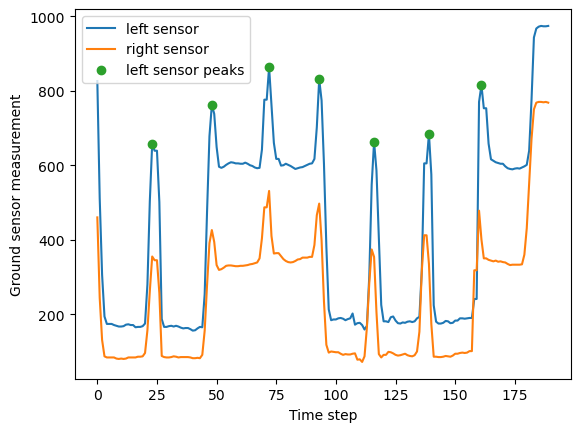

In [ ]:
# translational: speed unit conversion
# speed
l_sensor = [x["ground"][0] for x in my_thymio_data_trans_crop]
r_sensor = [x["ground"][1] for x in my_thymio_data_trans_crop]
avg_ground = [(l+r)/2 for l, r in zip(l_sensor, r_sensor)]
l_peaks = find_peaks(l_sensor, 610, 10)[0] # check with peaks detected in plot

plt.plot(l_sensor, label="left sensor")
plt.plot(r_sensor, label="right sensor")
plt.plot(l_peaks, [l_sensor[idx] for idx in l_peaks], "o", label = "left sensor peaks")
plt.xlabel("Time step")
plt.ylabel("Ground sensor measurement")
plt.legend()

Ts = 0.1
thymio_mms_speed = 6*50/Ts/(l_peaks[-1]-l_peaks[0]) # 6 has to be number of intervals between detected peaks
print("The Thymio's speed in mm/s is {}".format(thymio_mms_speed))

#conversion factor
thymio_speed_to_mms = thymio_mms_speed/50
print("To go from Thymio speed to mm/s, the conversion factor is {}".format(thymio_speed_to_mms))


The speed variance in mm^2/s^2 is 151.4387409522633
Length of speed data considered: 238


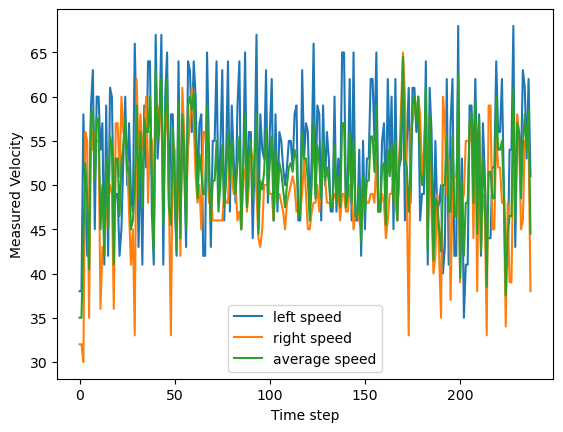

In [20]:
#translational variance estimation
l_speed = [x["left_speed"] for x in my_thymio_data_trans]
r_speed = [x["right_speed"] for x in my_thymio_data_trans]
avg_speed = [(x["left_speed"]+x["right_speed"])/2 for x in my_thymio_data_trans]
plt.plot(l_speed[55:], label="left speed")
plt.plot(r_speed[55:], label="right speed")
plt.plot(avg_speed[55:], label="average speed")
plt.xlabel("Time step")
plt.ylabel("Measured Velocity")
plt.legend()

var_speed = np.var(avg_speed[55:]/thymio_speed_to_mms) # took from 55 to avoid the initial transient and devid by the conversion factor
std_speed = np.std(avg_speed[55:]/thymio_speed_to_mms)
print("The speed variance in mm^2/s^2 is {}".format(var_speed))
print("Length of speed data considered: {}".format(len(avg_speed[55:])))


The Thymio's rotational speed in mm/s is 31.20787404228271
To go from Thymio rotational speed to mrad/s, the conversion factor is 8.322099744608723


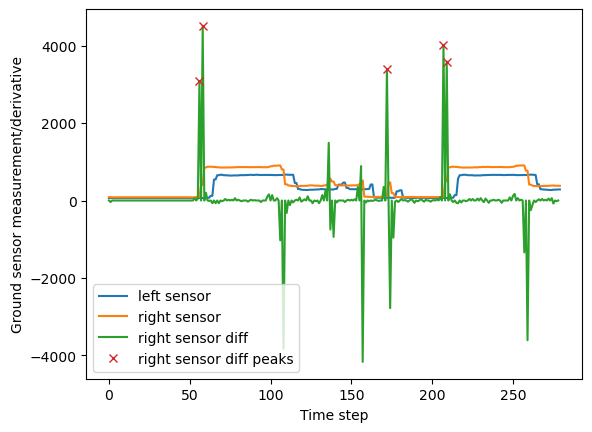

In [30]:
# rotational
# not necessary
# speed
Ts = 0.1
l_sensor_rot = [x["ground"][0] for x in my_thymio_data_rot]
r_sensor_rot = [x["ground"][1] for x in my_thymio_data_rot]
diff_right = np.diff(r_sensor_rot)/Ts
diff_peaks = find_peaks(diff_right, 2000, 5)[0]

plt.plot(l_sensor_rot, label="left sensor")
plt.plot(r_sensor_rot, label="right sensor")
plt.plot(diff_right, label="right sensor diff")
plt.plot(diff_peaks, [diff_right[idx] for idx in diff_peaks], "x", label = "right sensor diff peaks")
plt.xlabel("Time step")
plt.ylabel("Ground sensor measurement/derivative")
plt.legend()

Ts = 0.1
thymio_mms_rot_speed = 2*75*np.pi /Ts/ (diff_peaks[-2]-diff_peaks[0]) # radius 75mm (from center of turn to sensor)
# first peak is start of turn, second to last peak is the same position after one full rotation
print("The Thymio's rotational speed in mm/s is {}".format(thymio_mms_rot_speed))

# conversion factor
thymio_rot_speed_to_mradss = thymio_mms_rot_speed/50/75*1000
print("To go from Thymio rotational speed to mrad/s, the conversion factor is {}".format(thymio_rot_speed_to_mradss))


The rot speed variance in rad/s^2 is 0.005384749271228764
Length of rot speed data considered: 225


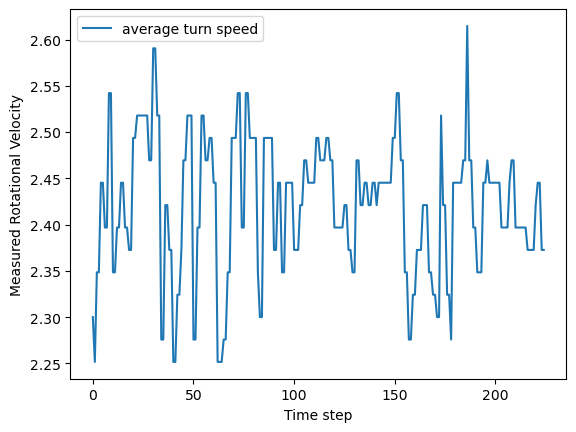

In [ ]:
# rotational covariance estimation
#Length between wheels in mm
L = 95

l_speed_rot = [x["left_speed"] for x in my_thymio_data_rot]
r_speed_rot = [x["right_speed"] for x in my_thymio_data_rot]
avg_speed_rot = [(x["left_speed"]/thymio_speed_to_mms-x["right_speed"]/thymio_speed_to_mms)/L for x in my_thymio_data_rot]
plt.plot(avg_speed_rot[55:], label="average turn speed")
plt.xlabel("Time step")
plt.ylabel("Measured Rotational Velocity")
plt.legend()

var_speed_rot = np.var(avg_speed_rot[55:]) # took from 55 to avoid the initial transient
print("The rot speed variance in rad/s^2 is {}".format(var_speed_rot))
print("Length of rot speed data considered: {}".format(len(avg_speed_rot[55:])))


In [46]:
# variance for the motors [translational, rotational]
var_motors = [var_speed/2, var_speed_rot/2] # divide by 2 to split equally in state and measurement variance
print("The variance for the motors [translational, rotational] is [{:.4g}, {:.4g}]".format(var_motors[0], var_motors[1]))

The variance for the motors [translational, rotational] is [75.72, 0.002692]


# Camera
get variance of position [x, y, theta] from measurement over 100 pictures in same position

The position variance in mm^2 is 2.8698156427822736, 3.7276445778735865 for x and y
The rotational variance in rad^2 is 0.0029917335740311797 for theta
The variance for the camera [x, y, theta] is [1.435, 1.864, 0.001496]


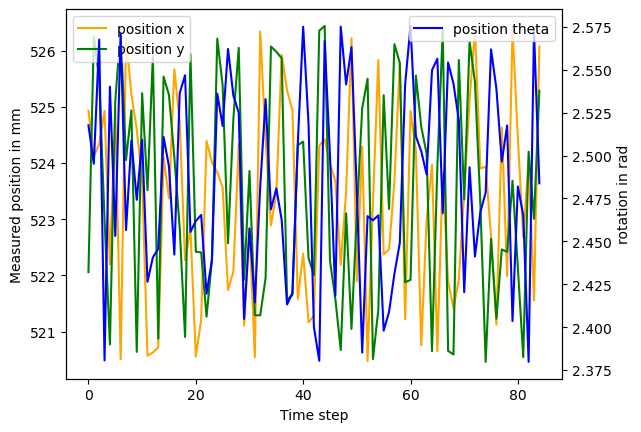

In [ ]:
import cv2
#import random

from Vision import matrix_perspective, convert_perspective, get_robot, get_picture_optimized
# camera variance estimation
acquire_camera_data = False  # set to True to acquire new camera data
thymio_camera_data = []
N_camera_samples = 100

# function to convert pixel to mm
#REAL SiZE OF THE ENVIRONMENT (cm)
L = 113.5
W = 81.3
Ratio = L/W
#SiZE IN PIXEL OF THE CORRECTED MAP
Y_res = 480
SIZE = [Y_res, int(Y_res*Ratio)]
def pixel_to_world_mm(pos):
    px, py = pos
    x = 10 * px * (L / SIZE[1])
    y = 10 * py * (W / SIZE[0])
    return x, y

def get_data_camera():
    img = get_picture_optimized()
    #img = cv2.imread("IMAGE_TEST8.jpeg")
    #TRANSFORM
    matrix = matrix_perspective(img)
    transformed_image = convert_perspective(img,matrix)

    #GET ROBOT POSITION AND ORIENTATION
    robot = get_robot(transformed_image)
    robot_pos_world = pixel_to_world_mm(robot[0])
    thymio_camera_data.append({"pos_x":robot_pos_world[0], #+random.uniform(-3,3), 
                            "pos_y":robot_pos_world[0], #+random.uniform(-3,3),
                            "theta":robot[1]}) #+random.uniform(-0.1,0.1)})
    
if acquire_camera_data:
    for i in range(N_camera_samples):
        get_data_camera()
        
else: # TODO: need to get some true data in here
    thymio_camera_data = [{"pos_x": np.float64(524.9327735101133), "pos_y": np.float64(522.0594012641486), "theta": np.float64(2.517670693723268)}, {"pos_x": np.float64(524.1150871308683), "pos_y": np.float64(526.2475531234519), "theta": np.float64(2.4952164855868437)}, {"pos_x": np.float64(524.3450200452098), "pos_y": np.float64(525.5094924588242), "theta": np.float64(2.567582966900295)}, {"pos_x": np.float64(524.9273001867286), "pos_y": np.float64(522.9931488654807), "theta": np.float64(2.3805846698050432)}, {"pos_x": np.float64(522.1972595481307), "pos_y": np.float64(520.7704038290655), "theta": np.float64(2.5402134461161134)}, {"pos_x": np.float64(524.933517011657), "pos_y": np.float64(525.1051232929904), "theta": np.float64(2.453179189295447)}, {"pos_x": np.float64(520.5064119415415), "pos_y": np.float64(526.3762217118754), "theta": np.float64(2.5711343644153413)}, {"pos_x": np.float64(526.2193281964262), "pos_y": np.float64(524.0539325928344), "theta": np.float64(2.4566004954557816)}, {"pos_x": np.float64(525.2238821799142), "pos_y": np.float64(524.9387128667674), "theta": np.float64(2.5088836448738405)}, {"pos_x": np.float64(524.6010042898885), "pos_y": np.float64(520.638915650999), "theta": np.float64(2.474232104111612)}, {"pos_x": np.float64(523.7051798081663), "pos_y": np.float64(525.2433786109034), "theta": np.float64(2.509185519506901)}, {"pos_x": np.float64(520.5721248775495), "pos_y": np.float64(523.5159816584537), "theta": np.float64(2.4264671454404385)}, {"pos_x": np.float64(520.6289495809743), "pos_y": np.float64(525.9042750432072), "theta": np.float64(2.4407141062901223)}, {"pos_x": np.float64(520.7205759261716), "pos_y": np.float64(520.8729444711702), "theta": np.float64(2.4456220343164965)}, {"pos_x": np.float64(524.100670529414), "pos_y": np.float64(525.5399155200865), "theta": np.float64(2.510797663189964)}, {"pos_x": np.float64(523.3711786461079), "pos_y": np.float64(525.2131002272295), "theta": np.float64(2.4936893769729114)}, {"pos_x": np.float64(525.6699030156692), "pos_y": np.float64(524.1034439474645), "theta": np.float64(2.442308511400024)}, {"pos_x": np.float64(524.7252333094026), "pos_y": np.float64(522.8455683604878), "theta": np.float64(2.536454986762373)}, {"pos_x": np.float64(522.2705046666765), "pos_y": np.float64(520.9040763593679), "theta": np.float64(2.5468374479528553)}, {"pos_x": np.float64(522.8271815259967), "pos_y": np.float64(525.9394870329928), "theta": np.float64(2.455514013710215)}, {"pos_x": np.float64(520.5561104137912), "pos_y": np.float64(522.4220653772937), "theta": np.float64(2.461885298004878)}, {"pos_x": np.float64(521.2135140653555), "pos_y": np.float64(522.4095582991441), "theta": np.float64(2.465400438082075)}, {"pos_x": np.float64(524.3921108287084), "pos_y": np.float64(521.2674764397335), "theta": np.float64(2.419440979979127)}, {"pos_x": np.float64(524.0174503777918), "pos_y": np.float64(522.2716279780997), "theta": np.float64(2.438973996767167)}, {"pos_x": np.float64(523.8382088685752), "pos_y": np.float64(526.2155007357277), "theta": np.float64(2.536088779754726)}, {"pos_x": np.float64(523.5677078460416), "pos_y": np.float64(525.3836552252241), "theta": np.float64(2.517291077696803)}, {"pos_x": np.float64(521.7410176092425), "pos_y": np.float64(522.5725310909692), "theta": np.float64(2.562135099079034)}, {"pos_x": np.float64(522.0719540450846), "pos_y": np.float64(524.795744723934), "theta": np.float64(2.53495831898626)}, {"pos_x": np.float64(524.3402639879412), "pos_y": np.float64(526.0511834892403), "theta": np.float64(2.5250553482683813)}, {"pos_x": np.float64(521.1045806297483), "pos_y": np.float64(521.9241621930992), "theta": np.float64(2.4048129737164525)}, {"pos_x": np.float64(522.8417095675032), "pos_y": np.float64(523.859315181596), "theta": np.float64(2.4574960245734596)}, {"pos_x": np.float64(520.5420484281965), "pos_y": np.float64(521.2920223373044), "theta": np.float64(2.414378662203754)}, {"pos_x": np.float64(526.3440816800869), "pos_y": np.float64(521.2897033679704), "theta": np.float64(2.4819037159515367)}, {"pos_x": np.float64(524.4358329392702), "pos_y": np.float64(521.9518826219604), "theta": np.float64(2.5329067484300167)}, {"pos_x": np.float64(522.8924690243075), "pos_y": np.float64(526.0757924047209), "theta": np.float64(2.4686677390356673)}, {"pos_x": np.float64(523.4472591299628), "pos_y": np.float64(525.9823965177737), "theta": np.float64(2.4809096045441708)}, {"pos_x": np.float64(525.9274308172659), "pos_y": np.float64(525.8664678476204), "theta": np.float64(2.4623829383107942)}, {"pos_x": np.float64(525.2958320507075), "pos_y": np.float64(521.567180296419), "theta": np.float64(2.413191474397417)}, {"pos_x": np.float64(524.9399594944663), "pos_y": np.float64(521.6508228381018), "theta": np.float64(2.4200459084109798)}, {"pos_x": np.float64(521.5802400888097), "pos_y": np.float64(524.3205035252541), "theta": np.float64(2.5072087193301544)}, {"pos_x": np.float64(522.3889210553194), "pos_y": np.float64(524.3815147826945), "theta": np.float64(2.5751115982014294)}, {"pos_x": np.float64(521.1646322554765), "pos_y": np.float64(522.3136629684941), "theta": np.float64(2.518367663439176)}, {"pos_x": np.float64(521.2841765032114), "pos_y": np.float64(522.0085923673049), "theta": np.float64(2.4000803040356224)}, {"pos_x": np.float64(524.3110292340803), "pos_y": np.float64(526.3569768146492), "theta": np.float64(2.380404895408288)}, {"pos_x": np.float64(524.4259809030505), "pos_y": np.float64(526.4421636443794), "theta": np.float64(2.5668304763235947)}, {"pos_x": np.float64(523.9898261055876), "pos_y": np.float64(522.2565974641014), "theta": np.float64(2.4999374620285946)}, {"pos_x": np.float64(523.6756435462797), "pos_y": np.float64(521.5778745059172), "theta": np.float64(2.418389347497029)}, {"pos_x": np.float64(522.1885676147473), "pos_y": np.float64(520.6732327997423), "theta": np.float64(2.5751764313066934)}, {"pos_x": np.float64(523.4875363015359), "pos_y": np.float64(523.1063759722734), "theta": np.float64(2.541468995436654)}, {"pos_x": np.float64(526.2198136338162), "pos_y": np.float64(521.0475489314923), "theta": np.float64(2.563176949841605)}, {"pos_x": np.float64(521.8988385618712), "pos_y": np.float64(523.0852740093989), "theta": np.float64(2.4783482051665007)}, {"pos_x": np.float64(524.2910454712444), "pos_y": np.float64(524.9797453325572), "theta": np.float64(2.3851706005703934)}, {"pos_x": np.float64(520.4740809272458), "pos_y": np.float64(525.5020368678875), "theta": np.float64(2.464709581189777)}, {"pos_x": np.float64(523.2946855117245), "pos_y": np.float64(520.5107195773398), "theta": np.float64(2.462301547944282)}, {"pos_x": np.float64(525.8334113568886), "pos_y": np.float64(521.3906781857557), "theta": np.float64(2.465166649256774)}, {"pos_x": np.float64(522.3720526626855), "pos_y": np.float64(525.2082078284086), "theta": np.float64(2.3979684120411235)}, {"pos_x": np.float64(522.4660632775779), "pos_y": np.float64(523.1821840091689), "theta": np.float64(2.4088542213006616)}, {"pos_x": np.float64(523.6749069821805), "pos_y": np.float64(526.1175148506807), "theta": np.float64(2.4311904080363003)}, {"pos_x": np.float64(525.7942767573767), "pos_y": np.float64(525.7827806310272), "theta": np.float64(2.44898115763829)}, {"pos_x": np.float64(521.2184278290823), "pos_y": np.float64(521.8789396718639), "theta": np.float64(2.541862963469526)}, {"pos_x": np.float64(524.9309691268295), "pos_y": np.float64(521.9209567946186), "theta": np.float64(2.575585313487277)}, {"pos_x": np.float64(524.2158378202286), "pos_y": np.float64(525.558124806591), "theta": np.float64(2.5111866252137514)}, {"pos_x": np.float64(520.758292833885), "pos_y": np.float64(524.6445145254164), "theta": np.float64(2.502540439927178)}, {"pos_x": np.float64(522.9988009027184), "pos_y": np.float64(524.166836081155), "theta": np.float64(2.489007150709471)}, {"pos_x": np.float64(523.9731880784601), "pos_y": np.float64(520.6509915538761), "theta": np.float64(2.549760733179002)}, {"pos_x": np.float64(520.6526289994255), "pos_y": np.float64(523.9381779773744), "theta": np.float64(2.556470926607995)}, {"pos_x": np.float64(523.8300560507635), "pos_y": np.float64(526.3700981895028), "theta": np.float64(2.4664972412615085)}, {"pos_x": np.float64(521.899659018557), "pos_y": np.float64(520.6573382007462), "theta": np.float64(2.554279249273467)}, {"pos_x": np.float64(521.4151834085293), "pos_y": np.float64(520.5922072010933), "theta": np.float64(2.541968355366384)}, {"pos_x": np.float64(521.9296083382684), "pos_y": np.float64(525.833927482042), "theta": np.float64(2.520544307763329)}, {"pos_x": np.float64(523.4674529842072), "pos_y": np.float64(523.3530937365384), "theta": np.float64(2.420401625619061)}, {"pos_x": np.float64(525.1118030411469), "pos_y": np.float64(526.1617934266465), "theta": np.float64(2.4932049535012495)}, {"pos_x": np.float64(526.3843921594007), "pos_y": np.float64(525.4472518271224), "theta": np.float64(2.4411576195567544)}, {"pos_x": np.float64(523.906209331186), "pos_y": np.float64(523.2962248382075), "theta": np.float64(2.4670461111729343)}, {"pos_x": np.float64(523.9354758944412), "pos_y": np.float64(520.4605202554703), "theta": np.float64(2.478573114101388)}, {"pos_x": np.float64(522.6997507637658), "pos_y": np.float64(522.6546980104268), "theta": np.float64(2.5618849688585312)}, {"pos_x": np.float64(521.1232626339249), "pos_y": np.float64(521.2291477019506), "theta": np.float64(2.5388967202240376)}, {"pos_x": np.float64(524.6315246971013), "pos_y": np.float64(522.4624310000472), "theta": np.float64(2.496541009279298)}, {"pos_x": np.float64(521.9881187405842), "pos_y": np.float64(522.4204013232668), "theta": np.float64(2.51756304842883)}, {"pos_x": np.float64(526.3828961782766), "pos_y": np.float64(523.6854512442637), "theta": np.float64(2.4035344639776226)}, {"pos_x": np.float64(524.434278813232), "pos_y": np.float64(522.1295107151816), "theta": np.float64(2.4819878778839324)}, {"pos_x": np.float64(522.6764722447415), "pos_y": np.float64(520.5451334645703), "theta": np.float64(2.4652304477331426)}, {"pos_x": np.float64(524.0666961787379), "pos_y": np.float64(524.2036483402018), "theta": np.float64(2.379734693745934)}, {"pos_x": np.float64(521.5539700613983), "pos_y": np.float64(523.0078281794575), "theta": np.float64(2.5728828138034565)}, {"pos_x": np.float64(526.0775552738479), "pos_y": np.float64(525.2872016735025), "theta": np.float64(2.4838708696621463)}]

    #thymio_camera_data = [{'pos_x': 0, 'pos_y': 0, 'theta': 0},{'pos_x': 1, 'pos_y': 1, 'theta': 0.1}, {'pos_x': 4, 'pos_y': 4, 'theta': 0.2}, {'pos_x': 1, 'pos_y': 1, 'theta': 0.1}]*25  # dummy data for testing

# position variance estimation
pos_x = [x["pos_x"] for x in thymio_camera_data]
pos_y = [x["pos_y"] for x in thymio_camera_data]
pos_theta = [x["theta"] for x in thymio_camera_data]

fig, ax1 = plt.subplots()
ax1.plot(pos_x, label="position x", color="orange")
ax1.plot(pos_y, label="position y", color="green")
ax1.set_xlabel("Time step")
ax1.set_ylabel("Measured position in mm")
ax1.legend(loc="upper left")

ax2 = ax1.twinx()
ax2.plot(pos_theta, label="position theta", color="blue")
ax2.set_ylabel("rotation in rad")
ax2.legend(loc="upper right")

var_pos_x = np.var(pos_x)
var_pos_y = np.var(pos_y)
var_pos_theta = np.var(pos_theta)
print("The position variance in mm^2 is {}, {} for x and y".format(var_pos_x, var_pos_y))
print("The rotational variance in rad^2 is {} for theta".format(var_pos_theta))

# variance for the camera [x, y, theta] 
var_camera = [var_pos_x/2, var_pos_y/2, var_pos_theta/2] # divide by 2 to split equally in state and measurement variance
print("The variance for the camera [x, y, theta] is [{:.4g}, {:.4g}, {:.4g}]".format(var_camera[0], var_camera[1], var_camera[2]))

In [12]:
# compute additional process noise parameters from simulation (q_x, q_y, q_theta, q_v_bias, q_w_bias)

import numpy as np
from scipy.signal import savgol_filter
from Filtering import wrap_angle, motors_to_vw


def smooth_pose(xytheta, window=21, poly=2):
    window = window if window % 2 == 1 else window + 1
    x = savgol_filter(xytheta[:,0], window, poly, mode='interp')
    y = savgol_filter(xytheta[:,1], window, poly, mode='interp')
    th_un = np.unwrap(xytheta[:,2])
    th_s = savgol_filter(th_un, window, poly, mode='interp')
    th = wrap_angle(th_s)
    return np.column_stack([x, y, th])

def estimate_q_model_mismatch_from_one_step_errors(x_meas, vl, vr, Ts, L, speed_to_mms,
                                                   q_v_ctrl, q_w_ctrl,
                                                   smooth_window=21, poly=2):
    x_ref = smooth_pose(x_meas, window=smooth_window, poly=poly)
    N = len(x_ref)
    errs = []
    mapped_ctrl_covs = []
    for k in range(1, N):
        th_prev = x_ref[k-1,2]
        v_cmd, w_cmd = motors_to_vw(vl[k-1], vr[k-1], speed_to_mms, L)

        x_pred = np.array([
            x_ref[k-1,0] + v_cmd*Ts*np.cos(th_prev),
            x_ref[k-1,1] + v_cmd*Ts*np.sin(th_prev),
            wrap_angle(th_prev + w_cmd*Ts)
        ])

        e = x_ref[k,:3] - x_pred
        e[2] = wrap_angle(e[2])
        errs.append(e)

        Gc = np.array([
            [Ts*np.cos(th_prev), 0.0],
            [Ts*np.sin(th_prev), 0.0],
            [0.0,                Ts]
        ])
        Qctrl = np.diag([q_v_ctrl, q_w_ctrl])
        mapped_ctrl_covs.append(Gc @ Qctrl @ Gc.T)

    errs = np.vstack(errs)
    emp_cov = np.cov(errs.T, ddof=1)
    Qc_mean = np.mean(mapped_ctrl_covs, axis=0)

    Q_res = emp_cov - Qc_mean
    qx_hat  = max(Q_res[0,0], 0.0)
    qy_hat  = max(Q_res[1,1], 0.0)
    qth_hat = max(Q_res[2,2], 0.0)
    return dict(qx_hat=qx_hat, qy_hat=qy_hat, qtheta_hat=qth_hat,
                empirical_error_cov=emp_cov, mean_mapped_ctrl_cov=Qc_mean)


def velocities_from_pose(xytheta, Ts):
    vx = np.gradient(xytheta[:,0], Ts)
    vy = np.gradient(xytheta[:,1], Ts)
    th = xytheta[:,2]
    v_exec = np.cos(th)*vx + np.sin(th)*vy
    w_exec = np.gradient(np.unwrap(th), Ts)
    return v_exec, w_exec

def estimate_q_bias_from_velocities(pose_meas, vl, vr, Ts, L, speed_to_mms,
                                    q_v_ctrl, q_w_ctrl,
                                    smooth_window=21, poly=2):
    # 1) Smooth pose to reduce camera noise
    pose_ref = smooth_pose(pose_meas, window=smooth_window, poly=poly)

    # 2) Executed velocities from pose
    v_exec, w_exec = velocities_from_pose(pose_ref, Ts)

    # 3) Control inputs from wheels
    v_cmd = np.zeros_like(v_exec)
    w_cmd = np.zeros_like(w_exec)
    for k in range(len(v_exec)):
        v_cmd[k], w_cmd[k] = motors_to_vw(vl[k], vr[k], speed_to_mms, L)

    # 4) Residuals between executed and commanded velocities
    dv = v_exec - v_cmd
    dw = w_exec - w_cmd

    # These residuals contain: fast execution noise (q_ctrl) + slow drift (random walk)
    # We want to extract the slow component’s per-step variance.
    # A simple and robust approach:
    # - Low-pass filter dv, dw (or moving average) to keep slow drift
    # - The variance of the increment of that slow component approximates the random-walk variance.

    # Low-pass with Savitzky–Golay (window > smooth_window to be conservative)
    window_lp = max(smooth_window, 31)
    window_lp = window_lp if window_lp % 2 == 1 else window_lp + 1
    dv_slow = savgol_filter(dv, window_lp, 2, mode='interp')
    dw_slow = savgol_filter(dw, window_lp, 2, mode='interp')

    # Random walk model: x_{k} = x_{k-1} + eta_k, Var(eta_k) = q_bias
    # So per-step increments of the slow component estimate q_bias directly:
    inc_v = np.diff(dv_slow)
    inc_w = np.diff(dw_slow)
    q_v_bias_hat = np.var(inc_v, ddof=1)
    q_w_bias_hat = np.var(inc_w, ddof=1)

    # Optional sanity: the fast component should roughly match q_ctrl (after removing slow)
    dv_fast = dv - dv_slow
    dw_fast = dw - dw_slow
    rv_fast = np.var(dv_fast, ddof=1)
    rw_fast = np.var(dw_fast, ddof=1)

    return dict(q_v_bias_hat=q_v_bias_hat,
                q_w_bias_hat=q_w_bias_hat,
                rv_fast=rv_fast, rw_fast=rw_fast)

def simulate_control_only_and_estimate():
    # Parameters (align with your project)
    Ts = 0.1
    T = 20.0
    N = int(T / Ts)
    L = 95.0
    speed_to_mms = 0.3375

    # Your measured variances
    q_v_ctrl = 75.72      # (mm/s)^2
    q_w_ctrl = 0.002692   # (rad/s)^2
    r_cam = (1.435, 1.864, 0.001496)  # camera [mm^2, mm^2, rad^2]

    # Simulate commands
    vl_cmd = np.ones(N) * 50.0
    vr_cmd = np.ones(N) * 50.0
    vr_cmd[N//4:N//2] = 35.0
    vl_cmd[N//2:3*N//4] = 35.0

    # Simulate executed velocities (commands + execution noise)
    rng = np.random.default_rng(1)
    exec_v_std = np.sqrt(q_v_ctrl)
    exec_w_std = np.sqrt(q_w_ctrl)

    # Generate ground-truth trajectory
    x_true = np.zeros((N, 3))  # [x,y,theta]
    for k in range(1, N):
        v_cmd, w_cmd = motors_to_vw(vl_cmd[k-1], vr_cmd[k-1], speed_to_mms, L)
        v_exec = v_cmd + rng.normal(0, exec_v_std)
        w_exec = w_cmd + rng.normal(0, exec_w_std)
        x, y, th = x_true[k-1]
        x_true[k,0] = x + v_exec*Ts*np.cos(th)
        x_true[k,1] = y + v_exec*Ts*np.sin(th)
        x_true[k,2] = wrap_angle(th + w_exec*Ts)

    # Create "measured" camera pose (adds noise like your camera)
    cam_x_std, cam_y_std, cam_th_std = np.sqrt(r_cam)
    x_meas = x_true.copy()
    x_meas[:,0] += rng.normal(0, cam_x_std, size=N)
    x_meas[:,1] += rng.normal(0, cam_y_std, size=N)
    x_meas[:,2] = wrap_angle(x_meas[:,2] + rng.normal(0, cam_th_std, size=N))

    # Estimate small Q terms from one-step errors (control-only)
    out = estimate_q_model_mismatch_from_one_step_errors(
        x_meas=x_meas,
        vl=vl_cmd, vr=vr_cmd,
        Ts=Ts, L=L, speed_to_mms=speed_to_mms,
        q_v_ctrl=q_v_ctrl, q_w_ctrl=q_w_ctrl,
        smooth_window=21, poly=2
    )
    q_bias = estimate_q_bias_from_velocities(x_meas, vl_cmd, vr_cmd, Ts, L, speed_to_mms,
                                    q_v_ctrl, q_w_ctrl,
                                    smooth_window=21, poly=2)
    
    print("Estimated small Q terms (per step):",
          "q_x =", out["qx_hat"], "mm^2,",
          "q_y =", out["qy_hat"], "mm^2,",
          "q_theta =", out["qtheta_hat"], "rad^2, \n", 
          "q_v_bias =", q_bias["q_v_bias_hat"], "(mm/s)^2,",
          "q_w_bias =", q_bias["q_w_bias_hat"], "(rad/s)^2"
    )
    return out



if __name__ == "__main__":
    simulate_control_only_and_estimate()

Estimated small Q terms (per step): q_x = 0.0 mm^2, q_y = 0.015993254291667112 mm^2, q_theta = 0.0 rad^2, 
 q_v_bias = 0.045978644244286396 (mm/s)^2, q_w_bias = 1.4239955057830071e-05 (rad/s)^2
